# Validating terrestrial water storage and evaporation

Important parts of the water balance and assessment of model performance are the terrestrial water storage (TWS) and evaporation (E). In this example, TWS is validated against GRACE/GRACE-FO data and E is benchmarked with GLEAM data. *pcrglobwb_utils* facilitates the validation process by providing scores per polygon of a shp-file.

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/JannisHoch/pcrglobwb_utils/dev?filepath=%2Fexamples%2FGRACE_GLEAM_validation.ipynb)

## Preambule

Loading required packages and showing package versions used.

In [13]:
%matplotlib inline
import pcrglobwb_utils
import xarray as xr
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import rasterio as rio
import spotpy as sp
import os, sys
import datetime

In [2]:
print('this notebook was created using Python', str((sys.version)), 'on a', str(sys.platform),'on', datetime.datetime.now())

this notebook was created using Python 3.8.5 | packaged by conda-forge | (default, Jul 31 2020, 01:53:45) [MSC v.1916 64 bit (AMD64)] on a win32 on 2021-06-21 10:47:13.610384


In [3]:
pcrglobwb_utils.utils.print_versions()

pcrglobwb_utils version 0.1.4.5b1
pandas version 1.2.4
xarray version 0.18.2
numpy version 1.20.3
geopandas version 0.9.0
rasterio version 1.1.5
rioxarray version 0.4.2


## Select the area

*pcrglobwb_utils* applies the TWS and E validation for an area as user-specified by means of a shp-file containing one or more polygons. Per polygon, both simulated and observed data is averaged per time step. With the resulting time series, performance metrics can be computed and visualized. For the example here, the water provinces located in Tanzania are used. Hence, the first step is to load the shp-file.

In [4]:
TZA_waterProvinces = pcrglobwb_utils.spatial_validation.validate_per_shape(shp_fo='example_data/Tanzania_shp/waterProvinces.shp',
                                                                           shp_key='watprovID')

reading shp-file C:\Users\hoch0001\Documents\_code\pcrglobwb_utils\examples\example_data\Tanzania_shp\waterProvinces.shp


Quickly inspect the extent information of the loaded data.

In [10]:
TZA_waterProvinces.extent_gdf.head()

,OBJECTID,MAJORBASIN,COUNTRY,REGION,watprov,watprovID,km2,Shape_Leng,Shape_Area,geometry
0,12,"Africa, East Central Coast",Tanzania,Iringa,"Tanzania_Iringa_Africa, East Central Coast",25,88460.9,22.002607,7.195788,"POLYGON ((36.29721 -5.12083, 36.29583 -5.12503..."
1,13,"Africa, East Central Coast",Tanzania,Lindi,"Tanzania_Lindi_Africa, East Central Coast",28,85004.1,15.485085,6.865913,"MULTIPOLYGON (((40.19511 -10.26096, 40.19125 -..."
2,14,"Africa, East Central Coast",Tanzania,Manyara,"Tanzania_Manyara_Africa, East Central Coast",29,36772.8,13.405812,2.976842,"POLYGON ((37.17537 -2.76838, 37.17193 -2.76958..."
3,15,"Africa, East Central Coast",Tanzania,Mbeya,"Tanzania_Mbeya_Africa, East Central Coast",30,17342.4,8.245606,1.414085,"POLYGON ((34.15102 -7.38556, 34.15304 -7.39140..."
4,16,"Africa, East Central Coast",Tanzania,Morogoro,"Tanzania_Morogoro_Africa, East Central Coast",31,146718.0,29.906623,11.605295,"MULTIPOLYGON (((39.25203 -8.00781, 39.24966 -8..."


### TWS validation

For validating simulated TWS, netCDF-files of both simulation and observation need to be provided. Per polygon, time series are retrieved and evaluated. This yields a dataframe with R and RMSE value per polygon.

In [11]:
watprov_gdf = TZA_waterProvinces.against_GRACE(PCR_nc_fo='example_data/GRACE/totalWaterStorageThickness_monthAvg_output_2010_Tanzania.nc',
                                               GRACE_nc_fo='example_data/GRACE/GRACE_data_2010_Tanzania.nc')

reading GRACE file C:\Users\hoch0001\Documents\_code\pcrglobwb_utils\examples\example_data\GRACE\GRACE_data_2010_Tanzania.nc
reading PCR-GLOBWB file C:\Users\hoch0001\Documents\_code\pcrglobwb_utils\examples\example_data\GRACE\totalWaterStorageThickness_monthAvg_output_2010_Tanzania.nc
extract raw data from nc-files
clipping nc-files to extent of shp-file
computing R and RMSE for polygon with key identifier watprovID 25
computing R and RMSE for polygon with key identifier watprovID 28
computing R and RMSE for polygon with key identifier watprovID 29
computing R and RMSE for polygon with key identifier watprovID 30
computing R and RMSE for polygon with key identifier watprovID 31
computing R and RMSE for polygon with key identifier watprovID 32
computing R and RMSE for polygon with key identifier watprovID 33
computing R and RMSE for polygon with key identifier watprovID 443
computing R and RMSE for polygon with key identifier watprovID 444
computing R and RMSE for polygon with key iden

In [19]:
watprov_gdf.head()

,OBJECTID,MAJORBASIN,COUNTRY,REGION,watprov,watprovID,km2,Shape_Leng,Shape_Area,geometry,R,RMSE
0,12,"Africa, East Central Coast",Tanzania,Iringa,"Tanzania_Iringa_Africa, East Central Coast",25,88460.9,22.002607,7.195788,"POLYGON ((36.29721 -5.12083, 36.29583 -5.12503...",0.96,0.34
1,13,"Africa, East Central Coast",Tanzania,Lindi,"Tanzania_Lindi_Africa, East Central Coast",28,85004.1,15.485085,6.865913,"MULTIPOLYGON (((40.19511 -10.26096, 40.19125 -...",0.84,0.69
2,14,"Africa, East Central Coast",Tanzania,Manyara,"Tanzania_Manyara_Africa, East Central Coast",29,36772.8,13.405812,2.976842,"POLYGON ((37.17537 -2.76838, 37.17193 -2.76958...",0.94,0.40
3,15,"Africa, East Central Coast",Tanzania,Mbeya,"Tanzania_Mbeya_Africa, East Central Coast",30,17342.4,8.245606,1.414085,"POLYGON ((34.15102 -7.38556, 34.15304 -7.39140...",0.99,0.41
4,16,"Africa, East Central Coast",Tanzania,Morogoro,"Tanzania_Morogoro_Africa, East Central Coast",31,146718.0,29.906623,11.605295,"MULTIPOLYGON (((39.25203 -8.00781, 39.24966 -8...",0.95,0.36


As *pcrglobwb_utils* returns a geo-dataframe, the R and RMSE values can also be plotted.

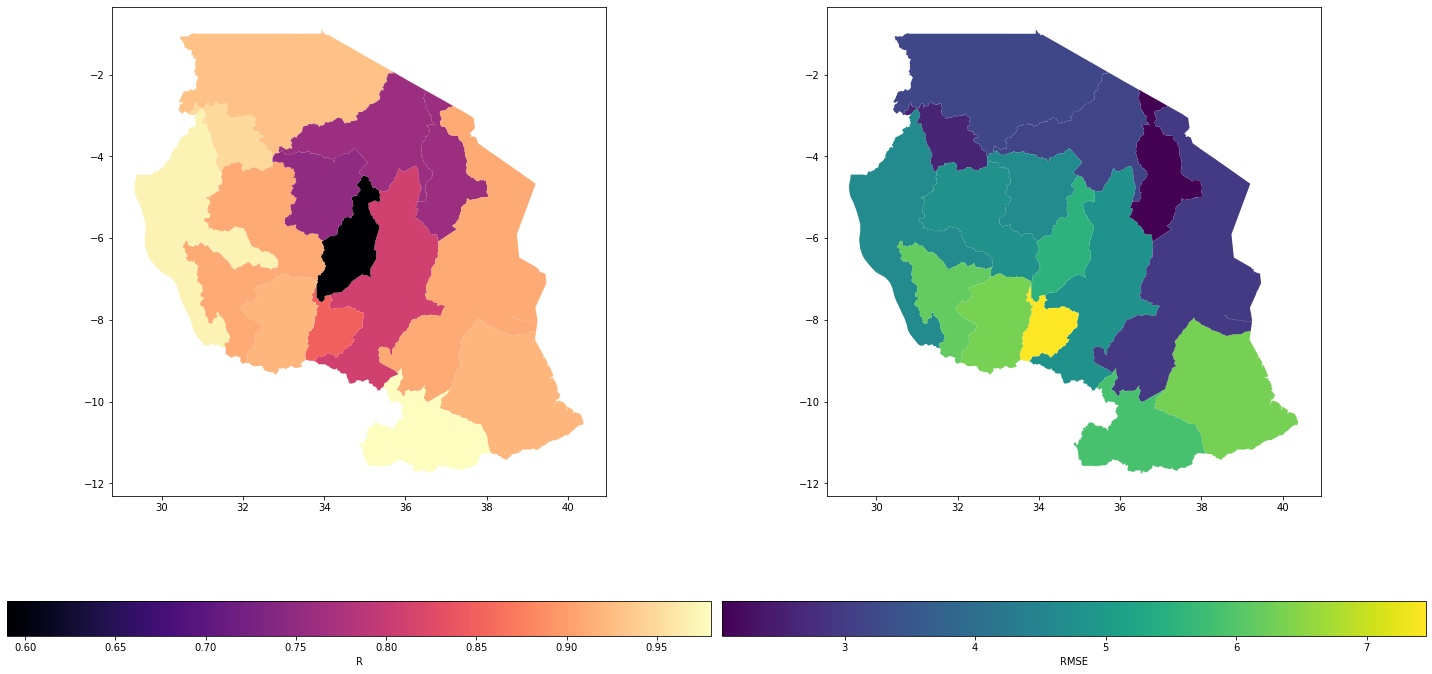

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
watprov_gdf.plot(column='R', ax=ax1, cmap='magma', legend=True, legend_kwds={'orientation':'horizontal', 'label':'R'})
watprov_gdf.plot(column='RMSE', ax=ax2, cmap='viridis', legend=True, legend_kwds={'orientation':'horizontal', 'label':'RMSE'})
plt.tight_layout();

### E benchmark

The same workflow is followed when benchmarking simulated E with GLEAM data.

In [17]:
watprov_gdf = TZA_waterProvinces.against_GLEAM(PCR_nc_fo='example_data/GLEAM/totalEvaporation_monthTot_output_2010_Tanzania.nc',
                                               GLEAM_nc_fo='example_data/GLEAM/GLEAM_data_2010_Tanzania.nc')

reading GLEAM file C:\Users\hoch0001\Documents\_code\pcrglobwb_utils\examples\example_data\GLEAM\GLEAM_data_2010_Tanzania.nc
reading PCR-GLOBWB file C:\Users\hoch0001\Documents\_code\pcrglobwb_utils\examples\example_data\GLEAM\totalEvaporation_monthTot_output_2010_Tanzania.nc
extract raw data from nc-files
clipping nc-files to extent of shp-file
computing R and RMSE for polygon with key identifier watprovID 25
computing R and RMSE for polygon with key identifier watprovID 28
computing R and RMSE for polygon with key identifier watprovID 29
computing R and RMSE for polygon with key identifier watprovID 30
computing R and RMSE for polygon with key identifier watprovID 31
computing R and RMSE for polygon with key identifier watprovID 32
computing R and RMSE for polygon with key identifier watprovID 33
computing R and RMSE for polygon with key identifier watprovID 443
computing R and RMSE for polygon with key identifier watprovID 444
computing R and RMSE for polygon with key identifier wat

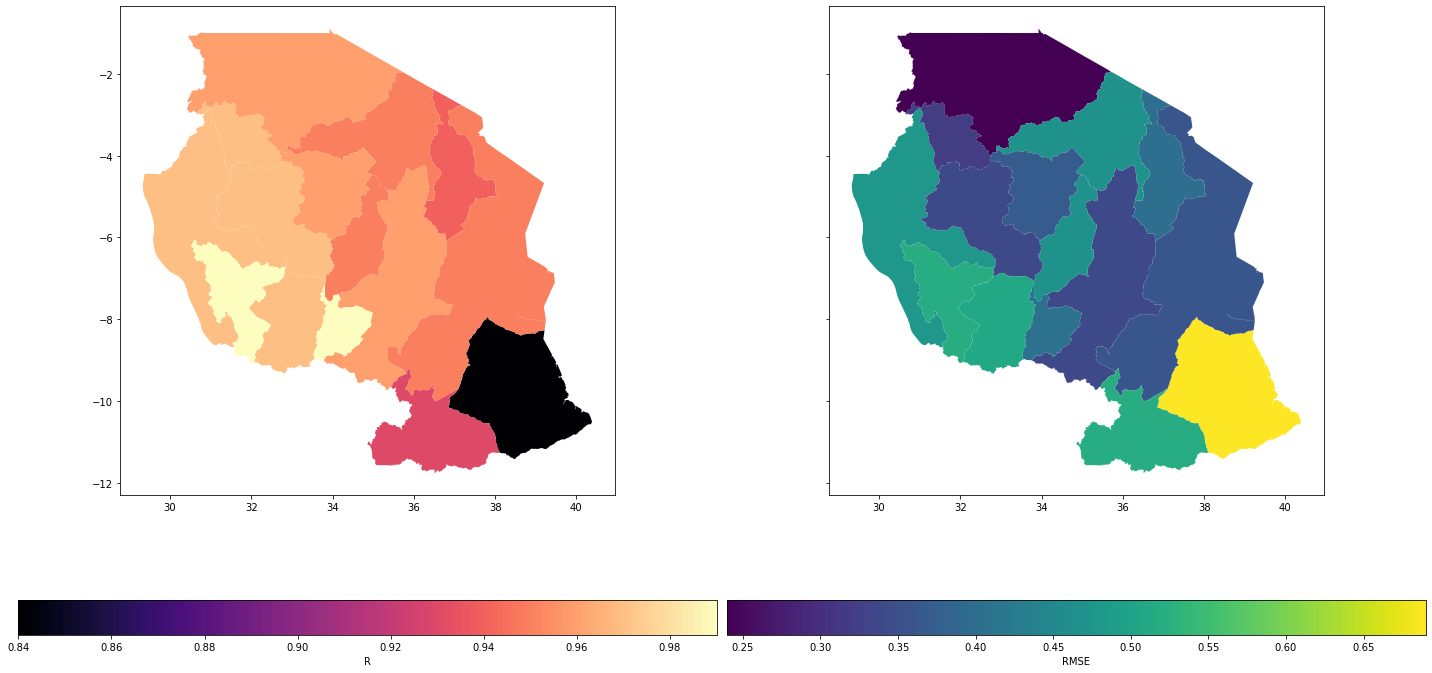

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10), sharey=True)
watprov_gdf.plot(column='R', ax=ax1, cmap='magma', legend=True, legend_kwds={'orientation':'horizontal', 'label':'R'})
watprov_gdf.plot(column='RMSE', ax=ax2, cmap='viridis', legend=True, legend_kwds={'orientation':'horizontal', 'label':'RMSE'})
plt.tight_layout();